# Lab session 2 ---- Logistic Regression

Student: ASRAF ALI Abdul Salam Rasmi                      
Date: 07/04/2019

## I. Introduction
In this exercise, we will implement logistic regression.
Note that you should have completed Lab1, and, in particular, understand the gradient descent algorithm.

## II. Logistic regression
Suppose that you are the administrator of a university department and you want to determine each applicant’s chance of admission based on their results on two exams.
The file lab2data1.txt contains historical data from previous applicants. The first two columns correspond to the applicant’s scores on the two exams and the last column is the admission decision; a value equals to 0 means the applicant was not selected, while a value equals to 1 means that he/she was accepted.
Your task is to build a classifier that will estimate an applicant’s probability of admission based on his scores in the two exams.

### Solution Question 1

#### Load & Plot Data

In [1]:
# Import the necessary Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.optimize as op

In [2]:
# Load the Data from .txt file
Data = pd.read_csv('lab2data1.txt', delimiter=',', header=None)

# Separate Input (x) and Output (y) data
X = Data.iloc[:,:-1].values
y = Data.iloc[:,-1].values

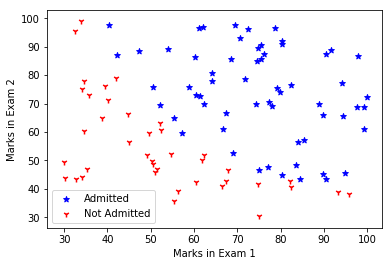

In [3]:
# Function to Plot the Data

def plotData(X, y):
    
    # Filter out the applicants who got admission
    Admitted = Data.loc[y == 1]

    # Filter out the applicants who didn't got admission
    NotAdmitted = Data.loc[y == 0]

    # Plot the data
    plt.scatter(Admitted.iloc[:,0], Admitted.iloc[:,1], c="b", marker="*", label='Admitted')
    plt.scatter(NotAdmitted.iloc[:,0], NotAdmitted.iloc[:,1], c="r", marker="1", label='Not Admitted')
    plt.legend()  
    plt.xlabel('Marks in Exam 1')
    plt.ylabel('Marks in Exam 2')

plotData(X, y)
plt.show()

### Solution Question 2

#### Compute the Sigmoid function

Logistic Regression uses a prediction function which is given by,

$$y(x) = \sigma(w^{T}\phi(x))$$

where $\phi$ is the basis function and $\sigma$ is the Sigmoid function which is given by,

$$ \sigma(z) = \frac{1}{(1+e^{-z})} $$

In [4]:
# Sigmoid Function

def sigmoid(Z):
    Sigma = 1.0 / (1.0 + np.exp(-Z))
    return Sigma

# Test for Sigmoid
sigmoid(0)

0.5

### Solution Question 3

#### Compute the Cost Function and Gradient

The Cross Entropy Function is given by,

$$E(w) = -log \ p(y|w)= - \frac{1}{N}\sum_{n=1}^{N} \{ y_{n}log(\phi_{n}) + (1 - y_{n})log(1 - \phi_{n})\}$$

with $\phi_{n} = p(C_{1}|\phi(x_{n}))=y(\phi_n) = \sigma(w^{T}\phi(x_n))$

and the Gradient Function is given by,

$$ \nabla E(w) = \frac{1}{N}\sum_{n=1}^{N} (y(\phi_n)-y_{n})\phi_n$$

In [5]:
# Cost Function

def costFunction(w, X, y):
    N = y.size
    Pred = sigmoid(X.dot(w))
    
    Cost = -1*(1/N)*(np.log(Pred).T.dot(y)+np.log(1-Pred).T.dot(1-y))
    
    return(Cost[0])

In [6]:
# Gradient Function

def gradient(w, X, y):
    N = y.size
    Pred = sigmoid(X.dot(w.reshape(-1,1)))
    
    Grad = (1/N)*X.T.dot(Pred-y)

    return(Grad.flatten())

In [7]:
# Add the bias term to the data
X1 = np.c_[np.ones((X.shape[0],1)), X]
y1 = np.c_[y]

# Initialize the Fitting Parameter
w_init = np.zeros(X1.shape[1])

# Compute Cost and Gradient for initial value
Cost = costFunction(w_init,X1,y1)
Grad = gradient(w_init,X1,y1)

print("Cost of initial w is",Cost)
print("Gradient at initial w is:",Grad)

Cost of initial w is 0.6931471805599453
Gradient at initial w is: [ -0.1        -12.00921659 -11.26284221]


### Solution Question 4

#### Perform Optimization

The optimal value for w can be computed using Gradient Descent as follows,

$$ w \gets w - \alpha \nabla E(w) $$

In [8]:
# Function to perform Feature Normalization

def featureNormalization(X):
    
    mean=np.mean(X,axis=0)
    std=np.std(X,axis=0)
    
    X_norm = (X - mean)/std
    
    return X_norm , mean , std

In [9]:
X_norm, X_mean, X_std = featureNormalization(X)
X_GD = np.append(np.ones((X_norm.shape[0],1)),X_norm,axis=1)
y_GD = y.reshape(X.shape[0],1)
Cost_GD = costFunction(w_init, X_GD, y_GD)
Grad_GD = gradient(w_init, X_GD, y_GD)

print("Cost of initial w (after Normalization) is:", Cost_GD)
print("Gradient at initial w (after Normalization) is:", Grad_GD)

Cost of initial w (after Normalization) is: 0.6931471805599453
Gradient at initial w (after Normalization) is: [-0.1        -0.28122914 -0.25098615]


In [10]:
# Function to estimate optimal values for w using Gradient Descent

def gradientDescent(w, X, y, alpha, Iter):
    
    N=len(y)
    Cost =[]
    
    for i in range(Iter):
        cost = costFunction(w,X,y)
        grad = gradient(w,X,y)

        w = w - (alpha * grad)
        Cost.append(cost)
    
    return w , Cost

In [11]:
w_GD, CostAppend = gradientDescent(w_init, X_GD, y_GD, 1, 400)
print('Estimated optimal values for w are: {}'.format(w_GD))

Estimated optimal values for w are: [1.65947664 3.8670477  3.60347302]


##### Alternatively, we can also use optimize.minimize from scipy library to perform Optimization

Here there is no need for Normalization

In [12]:
# Function to estimate optimal values for w (scipy.optimize)

res = op.minimize(costFunction, w_init, args=(X1,y1), method=None, jac=gradient, options={'maxiter':400})
w = res.x
print('Estimated optimal values for w are: {}'.format(res.x))

Estimated optimal values for w are: [-25.16133284   0.2062317    0.2014716 ]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in log
  import sys


### Solution Question 5

#### Plot the Decision Boundary

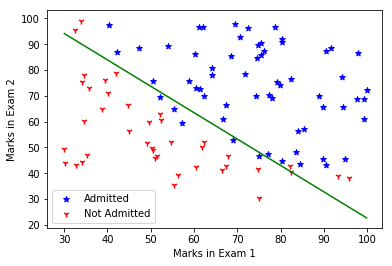

In [14]:
# Plot

plotData(X,y)
X_val = np.array([np.min(X1[:,1]),np.max(X1[:,1])])
y_val = -(w[0] +w[1]*X_val)/w[2]
plt.plot(X_val,y_val, "g")
plt.show()

### Solution Question 6

#### Predict the Probability for future data

For a Student with Exam-1 score = 45 and Exam-2 score = 85. Predict the Admission Probability

In [14]:
# Admission Probability

X_test = np.array([45,85])
X_test = np.append(np.ones(1),X_test)
Prob = sigmoid(X_test.dot(w.T))
print('Admission Probability is {}'.format(Prob))

Admission Probability is 0.7762907240588942


In [15]:
# Prediction Function

def predict(w, X):
    p = sigmoid(X.dot(w.T))>=0.55 # Set a Threshold
    return(p.astype('int'))

In [16]:
# Admission Prediction

Output = predict(w,X_test)
if Output == 1:
    print('The Candidate can be Admitted')
else:
    print('The Candidate can be Rejected')

The Candidate can be Admitted


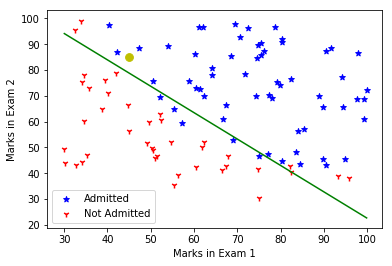

In [17]:
# Plot the new data in the figure

plotData(X,y)
plt.scatter(45, 85, s=60, c='y', marker='o', label='(45, 85)')
x_value = np.array([np.min(X1[:,1]),np.max(X1[:,1])])
y_value = -(w[0] +w[1]*x_value)/w[2]
plt.plot(x_value, y_value, "g")
plt.show()

In [18]:
# Check the Training Accuracy of the System

p = predict(w, X1) 
print('Training accuracy is {}%'.format(100*sum(p == y)/p.size))

Training accuracy is 90.0%


### III. Logistic regression with regularization
In this part, we will see the full power of logistic regression. Suppose that you are the production manager of a factory that produces microchips. After production, each microchip goes through various tests to ensure it functions correctly.
The file lab2data2.txt contains test results for some microchips on two tests. The first two columns correspond to the tests results, and the last column indicates whether the microchip should be accepted or not; 0 means rejected while 1 means accepted.
Using your function plotData(X,y), you can visualize the training data. As can be seen in Figure 3, this data is clearly not linearly separable, so a straight-forward application of logistic regression will not find a good decision boundary.

### Solution Question 1

#### Load & Plot Data

In [19]:
# Load the Data from .txt file
Data = pd.read_csv('lab2data2.txt', delimiter=',', header = None)

# Separate Input (x) and Output (y) data
X = Data.iloc[:,:-1].values
y = Data.iloc[:,-1].values

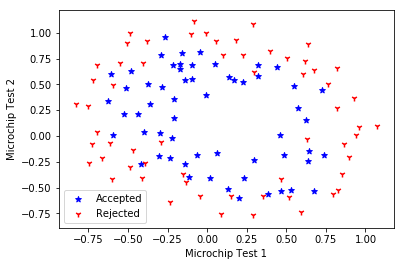

In [20]:
# Function to Plot the Data

def plotData(X, y):
    
    # Filter out the applicants who got admission
    Accepted = Data.loc[y == 1]

    # Filter out the applicants who didn't got admission
    Rejected = Data.loc[y == 0]

    # Plot the data
    plt.scatter(Accepted.iloc[:,0], Accepted.iloc[:,1], c="b", marker="*", label='Accepted')
    plt.scatter(Rejected.iloc[:,0], Rejected.iloc[:,1], c="r", marker="1", label='Rejected')
    plt.legend()  
    plt.xlabel('Microchip Test 1')
    plt.ylabel('Microchip Test 2')

plotData(X, y)
plt.show()

#### Map Features into Polynomial terms

In [21]:
# Map Features into all possible polynomial terms up to the given degree

def transformFeatures(x1, x2,degree):
    
    phi_x = np.ones(len(x1)).reshape(len(x1),1)
    for i in range(1,degree+1):
        for j in range(i+1):
            terms = (x1**(i-j) * x2**j).reshape(len(x1),1)
            phi_x = np.hstack((phi_x,terms))
    return phi_x

In [22]:
# Map the given data
X = transformFeatures(X[:,0], X[:,1], 6)

### Solution Question 2

#### Compute the Cost Function and Gradient

The Cross Entropy Function is given by,

$$E(w) = -log \ p(y|w)= - \frac{1}{N}\sum_{n=1}^{N} \{ y_{n}log(\phi_{n}) + (1 - y_{n})log(1 - \phi_{n})\} + \frac{\lambda}{2}\sum_{k=1}^{M}w_{k}^{2}$$

with $\phi_{n} = p(C_{1}|\phi(x_{n}))=y(\phi_n) = \sigma(w^{T}\phi(x_n))$

and the Gradient Function is given by,

$$ \nabla E(w) = \frac{1}{N}\sum_{n=1}^{N} (y(\phi_n)-y_{n})\phi_n + \lambda w_{i}$$

In [23]:
# Regularized Cost Function

def costFunctionReg(w, X, y, Lambda):
    
    N = len(y)
    y = y[:,np.newaxis]
    
    # Compute Cost
    Pred = sigmoid(X.dot(w))
    Cost = 1/N * sum((-y * np.log(Pred)) - ((1-y)*np.log(1-Pred)))
    RegCost = Cost + Lambda/(2*N) * sum(w**2)
    
    return RegCost[0]

In [24]:
# Regularized Gradient Function

def gradientReg(w, X, y, Lambda):
    
    N = len(y)
    y = y[:,np.newaxis]
    
    # Compute Gradient
    Pred = sigmoid(X.dot(w))
    j_0 = 1/N * (X.T.dot(Pred - y))[0]
    j_1 = 1/N * (X.T.dot(Pred - y))[1:] + (Lambda/N)* w[1:]
    Grad = np.vstack((j_0[:,np.newaxis],j_1))
    return Grad

In [25]:
# Initialize the Fitting Parameters
w_init = np.zeros((X.shape[1], 1))

# Set Regularization Parameter (lambda)
Lambda = 1

#Compute Regularized Cost Function & Gradient Function
Cost = costFunctionReg(w_init, X, y, Lambda)
Grad = gradientReg(w_init, X, y, Lambda)

print("Cost of initial w is", Cost)

Cost of initial w is 0.6931471805599461


### Solution Question 3

#### Perform Regularized Optimization

The optimal value for w can be computed using Gradient Descent as follows,

$$ w \gets w - \alpha \nabla E(w) $$

In [26]:
# Estimate regularized optimal values for w using Gradient Descent

def gradientDescent(X, y, w, alpha, Iter, Lambda):
    
    Cost = []
    
    for i in range(Iter):
        cost = costFunctionReg(w, X, y, Lambda)
        grad = gradientReg(w, X, y, Lambda)        
        w = w - (alpha * grad)
        Cost.append(cost)
    
    return w, Cost

In [27]:
w, Cost = gradientDescent(X, y, w_init, 1, 800, 1)
print('Estimated regularized optimal values for w are: {}'.format(w))

Estimated regularized optimal values for w are: [[ 1.27265124]
 [ 0.62523599]
 [ 1.1810378 ]
 [-2.01978329]
 [-0.91724531]
 [-1.43134994]
 [ 0.12404797]
 [-0.36557345]
 [-0.35735547]
 [-0.17504587]
 [-1.45820475]
 [-0.05113418]
 [-0.61561074]
 [-0.27466602]
 [-1.19283627]
 [-0.24214745]
 [-0.20606386]
 [-0.04487072]
 [-0.27776645]
 [-0.29539556]
 [-0.45646407]
 [-1.04327004]
 [ 0.02766609]
 [-0.29248124]
 [ 0.01548151]
 [-0.32739751]
 [-0.14386541]
 [-0.92484738]]


#### Plot the Decision Boundary

In [28]:
# To define the Decision Boundary
def transformFeaturesPlot(x1, x2, degree):
    
    out = np.ones(1)
    for i in range(1,degree+1):
        for j in range(i+1):
            terms= (x1**(i-j) * x2**j)
            out= np.hstack((out,terms))
    return out

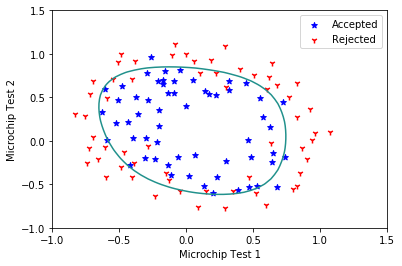

In [29]:
# Plot the Decision Boundary

plotData(X,y)
X_val = np.linspace(-1,1.5,50)
y_val = np.linspace(-1,1.5,50)
Z = np.zeros((len(X_val),len(y_val)))
for i in range(len(X_val)):
    for j in range(len(y_val)):
        Z[i,j] = transformFeaturesPlot(X_val[i],y_val[j],6).dot(w) 

plt.contour(X_val,y_val,Z.T,0)
plt.show()

### Solution Question 4

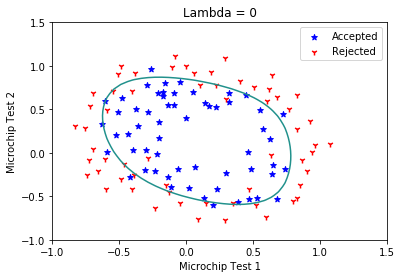

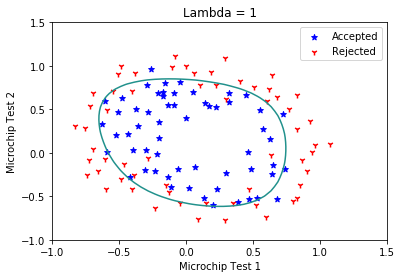

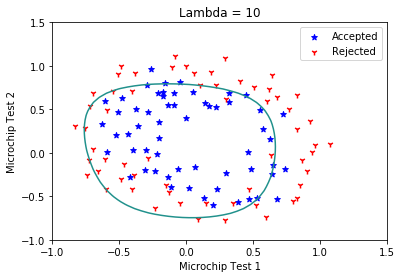

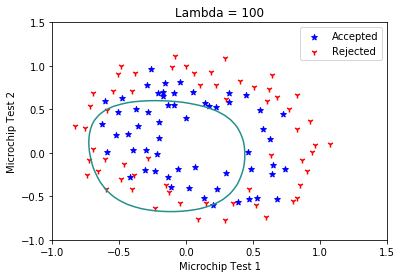

In [30]:
# Plotting the Decision Boundary fro different values of Lambda

for i, Lambda in enumerate([0, 1, 10, 100]):
    w, Cost = gradientDescent(X, y, w_init, 1, 800, Lambda)
    plotData(X,y)
    X_val = np.linspace(-1,1.5,50)
    y_val = np.linspace(-1,1.5,50)
    Z = np.zeros((len(X_val),len(y_val)))
    for i in range(len(X_val)):
        for j in range(len(y_val)):
            Z[i,j] = transformFeaturesPlot(X_val[i],y_val[j],6).dot(w) 

    plt.contour(X_val,y_val,Z.T,0)
    plt.title('Lambda = {}'.format(Lambda))
    plt.show()

##### As we can see small values for Lambda prevents the "Overfitting" problem, but for higher values of Lambda the model doesnot fit to the data thereby causing "Underfitting".